In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

city_df = pd.read_csv('B:/datasets/climate-data/GlobalLandTemperaturesByCity.csv')
country_df = pd.read_csv('B:/datasets/climate-data/GlobalLandTemperaturesByCountry.csv')
global_temp_df = pd.read_csv('B:/datasets/climate-data/GlobalTemperatures.csv')


In [2]:
city_df.head(5)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
country_df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
global_temp_df.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
global_temp_df.shape

(3192, 9)

In [6]:
country_df.shape

(577462, 4)

In [7]:
city_df.shape

(8599212, 7)

In [8]:
city_df.Country.unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [9]:
India = city_df[city_df.Country == 'India']
India.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49880,1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E
49881,1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E
49882,1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E
49883,1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E
49884,1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E


In [10]:
India = India.set_index('dt')
India.head(5)

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E
1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E
1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E
1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E
1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E


In [11]:
India.index = pd.to_datetime(India.index)
India.index.dtype

dtype('<M8[ns]')

In [12]:
mean_temp_month = India.groupby([India.index.month.rename('month'),India.City])['AverageTemperature'].mean().reset_index()
mean_temp_month.head(5)

,month,City,AverageTemperature
0,1,Abohar,12.430848
1,1,Achalpur,19.482748
2,1,Adilabad,21.799743
3,1,Adoni,23.679643
4,1,Agartala,17.918505


In [13]:
main_cities = mean_temp_month[mean_temp_month.City.isin(['Hyderabad','Bhopal','Calcutta','New Delhi','Bombay'])]
main_cities = main_cities.set_index('month')
main_cities.head(5)

,City,AverageTemperature
month,,
1,Bhopal,17.892529
1,Bombay,24.192095
1,Calcutta,18.534335
1,Hyderabad,22.758290
1,New Delhi,14.238560


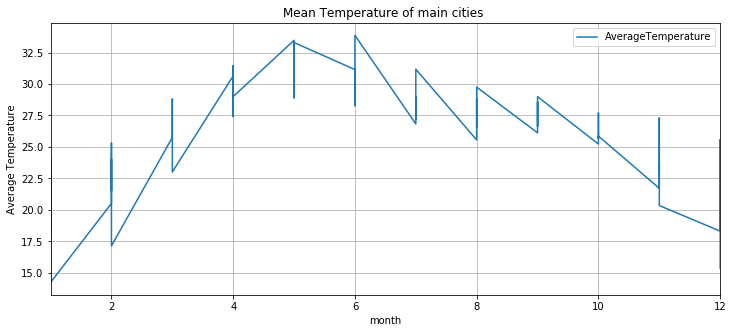

In [14]:
main_cities.plot(figsize=(12,5))
plt.title('Mean Temperature of main cities ')
plt.ylabel('Average Temperature')
plt.grid(True)

In [15]:
main_cities = main_cities.fillna(main_cities.mean())
main_cities.tail(5)

,City,AverageTemperature
month,,
12,Bhopal,18.315726
12,Bombay,25.574889
12,Calcutta,19.156114
12,Hyderabad,21.892538
12,New Delhi,15.378814


In [16]:
India_mean_temperature_yearly = India.groupby([India.index.year.rename('Year'),India.City])['AverageTemperature'].mean().reset_index()
India_mean_temperature_yearly.tail(10)

,Year,City,AverageTemperature
84668,2013,Vidisha,26.373500
84669,2013,Vijayawada,29.418250
84670,2013,Virar,26.093375
84671,2013,Visakhapatnam,26.879500
84672,2013,Vizianagaram,26.879500
84673,2013,Warangal,29.242625
84674,2013,Wardha,28.880500
84675,2013,Yamunanagar,24.999625
84676,2013,Yavatmal,28.880500
84677,2013,Yelahanka,26.410500


In [17]:
main_cities_yearly = India_mean_temperature_yearly[India_mean_temperature_yearly.City.isin(['Hyderabad','Bhopal','Calcutta','New Delhi','Bombay'])]
main_cities_yearly = main_cities_yearly.set_index('Year')
main_cities_yearly.head()


,City,AverageTemperature
Year,,
1796,Bhopal,25.058417
1796,Bombay,26.397833
1796,Calcutta,25.886250
1796,Hyderabad,26.532250
1796,New Delhi,25.030250


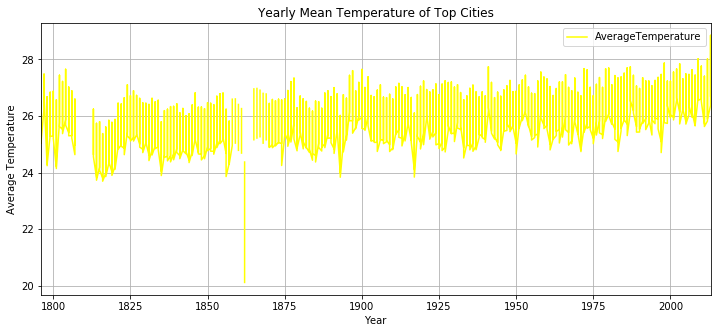

In [18]:
main_cities_yearly.plot(color = 'yellow',figsize =(12,5))
plt.title('Yearly Mean Temperature of Top Cities')
plt.ylabel("Average Temperature")
plt.grid(True)

In [19]:
global_temp_df = global_temp_df.set_index('dt')
global_temp_df.index = pd.to_datetime(global_temp_df.index)
global_temp_df = global_temp_df.resample('A').mean()
global_temp_df.head(5)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-12-31,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1751-12-31,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
1752-12-31,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
1753-12-31,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
1754-12-31,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN


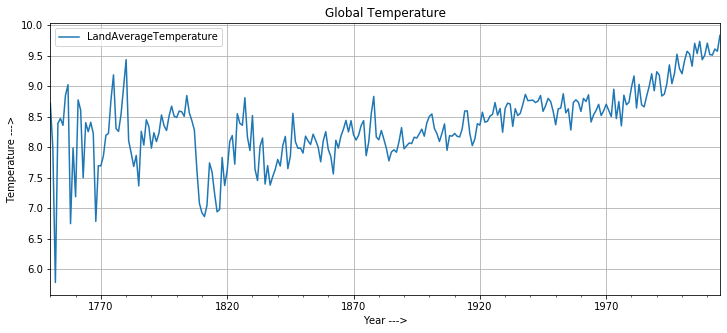

In [20]:
x = global_temp_df.loc[:,['LandAverageTemperature']]
x.plot(figsize=(12,5))
plt.title('Global Temperature')
plt.xlabel("Year --->")
plt.ylabel("Temperature --->")
plt.grid(True)

In [21]:
country_df = country_df.set_index('dt')
country_df.index = pd.to_datetime(country_df.index)
country_df.head(5)

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [29]:
country_diff = country_df.groupby([country_df.index.year.rename('year'),'Country']).AverageTemperature.mean().reset_index()
country_diff.head(5)

,year,Country,AverageTemperature
0,1743,Albania,8.620
1,1743,Andorra,7.556
2,1743,Austria,2.482
3,1743,Belarus,0.767
4,1743,Belgium,7.106


In [30]:
country_diff = country_diff.groupby(['Country']).AverageTemperature.agg(['max','min']).reset_index()
country_diff['diff'] = country_diff['max']-country_diff['min']
country_diff.head(5)

,Country,max,min,diff
0,Afghanistan,18.379571,12.547167,5.832405
1,Africa,25.472500,23.036000,2.436500
2,Albania,14.993875,5.588250,9.405625
3,Algeria,25.215667,10.343000,14.872667
4,American Samoa,27.537917,25.667167,1.870750


In [31]:
country_temp_max = country_diff.nlargest(8, columns = 'diff')
country_temp_max

,Country,max,min,diff
39,Canada,0.792714,-22.616000,23.408714
180,Russia,-1.628333,-21.342000,19.713667
115,Kazakhstan,8.937250,-8.789000,17.726250
159,North America,6.436000,-11.192667,17.628667
119,Kuwait,27.638667,12.020000,15.618667
234,Uzbekistan,16.188250,0.848000,15.340250
232,United States,12.231000,-2.774667,15.005667
225,Turkmenistan,18.613500,3.693000,14.920500


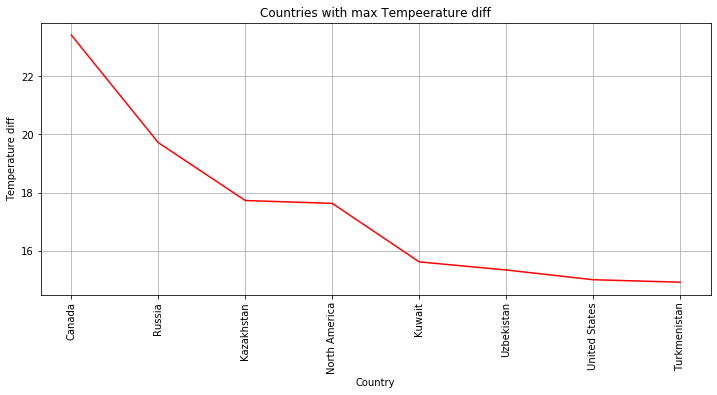

In [33]:
plt.figure(figsize=(12,5))
plt.title('Countries with max Temperature diff')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature diff')
plt.plot(country_temp_max['Country'],country_temp_max['diff'], color='r')
plt.grid(True)

In [34]:
country_temp_min = country_diff.nsmallest(8, columns = 'diff')
country_temp_min

,Country,max,min,diff
91,Guam,27.778417,26.144083,1.634333
161,Northern Mariana Islands,27.778417,26.144083,1.634333
166,Palau,28.006417,26.262667,1.743750
170,Papua New Guinea,25.419750,23.608917,1.810833
201,Somalia,27.975625,26.159083,1.816542
200,Solomon Islands,27.586250,25.755417,1.830833
203,South America,22.857000,21.024917,1.832083
188,Samoa,27.236667,25.388000,1.848667


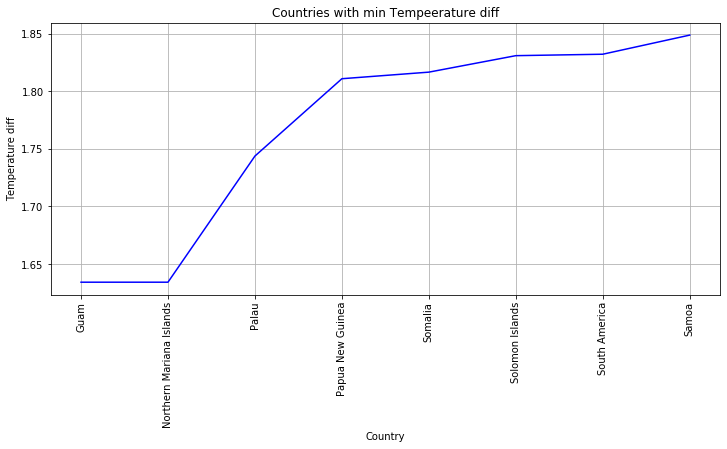

In [35]:
plt.figure(figsize=(12,5))
plt.title('Countries with min Temperature diff')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature diff')
plt.plot(country_temp_min['Country'],country_temp_min['diff'], color='b')
plt.grid(True)

In [40]:
developed = ['Norway', 'United Kingdom', 'France', 'Germany', 'Japan', 'Canada', 'Switzerland', 'United States', 'Sweden', 'South Korea', 'Australia']
developed_df=country_df[country_df.Country.isin(developed)]
developed_df=developed_df.groupby([developed_df.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
developed_df.head()

,Year,Country,AverageTemperature
0,1743,France,10.203
1,1743,Germany,5.468
2,1743,Norway,-3.503
3,1743,Sweden,-1.444
4,1743,Switzerland,3.572


In [42]:
developing = ['China', 'India', 'Columbia', 'Brazil', 'Mexico', 'Indonesia', 'Philippines', 'Maldives', 'Turkey', 'South Africa', 'Libya']
developing_df=country_df[country_df.Country.isin(developing)]
developing_df=developing_df.groupby([developing_df.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
developing_df.head()

,Year,Country,AverageTemperature
0,1777,Turkey,12.688500
1,1778,Turkey,11.931250
2,1779,Turkey,12.031333
3,1780,Turkey,12.248333
4,1781,Turkey,11.669083


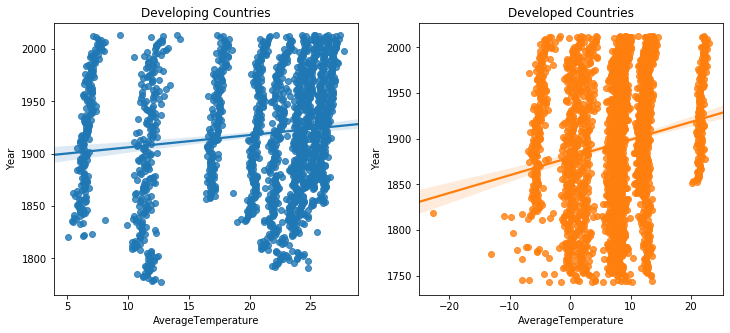

In [43]:
fig, axs = plt.subplots(ncols=2,figsize=(12,5))
sns.regplot(x='AverageTemperature',y='Year',fit_reg=True,data=developing_df, ax=axs[0])
axs[0].set(title = 'Developing Countries')
sns.regplot(x='AverageTemperature',y='Year',fit_reg=True,data=developed_df, ax=axs[1])
axs[1].set(title ='Developed Countries');

In [44]:
developing_df = developing_df[developing_df['Year'] > 1900]

X = developing_df['Year'].values.reshape(-1,1)
Y = developing_df['AverageTemperature']
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#fit the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predict the test set results
y_pred_1 = regressor.predict(X_test)
y_pred_1

array([19.77962655, 19.60692046, 20.4795407 , 20.51589988, 20.42500194,
       19.53420211, 19.77053676, 20.26138564, 19.56147149, 20.02505099,
       20.06141017, 20.39773255, 19.57965108, 19.61601026, 20.4795407 ,
       19.91597346, 20.27956523, 19.63418985, 19.65236943, 20.16139791,
       20.46136111, 20.55225905, 20.20684688, 19.77962655, 20.00687141,
       19.98869182, 20.05232038, 19.60692046, 20.37955296, 20.34319379,
       20.3250142 , 19.5432919 , 20.51589988, 19.97960202, 20.1704877 ,
       20.36137338, 20.25229585, 20.1704877 , 20.09776935, 19.73417758,
       19.56147149, 20.1704877 , 19.58874087, 19.88870408, 19.67054902,
       20.03414079, 19.94324285, 20.46136111, 19.79780614, 19.93415305,
       20.1704877 , 19.84325511, 20.46136111, 20.55225905, 20.37046317,
       20.35228358, 19.78871635, 20.31592441, 20.47045091, 20.11594893,
       19.8523449 , 20.30683461, 19.64327964, 19.83416532, 20.49772029,
       19.80689593, 19.82507552, 19.62510005, 19.8523449 , 20.04

In [48]:
regressor.predict([[2022]])

array([9.38693924])

In [46]:
developed_df = developed_df[developed_df['Year'] > 1900]

X = developed_df['Year'].values.reshape(-1,1)
Y = developed_df['AverageTemperature']
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#fit the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predict the test set results
y_pred_2 = regressor.predict(X_test)
y_pred_2

array([9.25956093, 7.83009313, 7.90085886, 8.84911968, 7.68856166,
       9.14633575, 9.07557002, 8.24053438, 8.26884067, 8.62266933,
       8.86327282, 8.82081338, 7.7310211 , 7.67440852, 8.07069662,
       8.21222808, 8.60851619, 8.07069662, 8.3679127 , 7.91501201,
       8.29714696, 8.45283158, 8.12730921, 8.60851619, 8.46698472,
       8.46698472, 7.90085886, 9.08972317, 8.73589451, 7.84424628,
       9.21710149, 8.08484977, 8.14146235, 9.08972317, 7.74517425,
       8.99065114, 8.41037214, 8.84911968, 7.98577774, 8.25468752,
       8.56605675, 9.04726373, 8.7642008 , 7.67440852, 8.16976865,
       9.25956093, 8.82081338, 7.77348054, 8.69343507, 8.22638123,
       7.7310211 , 8.52359731, 8.5519036 , 9.24540778, 8.42452528,
       7.71686796, 8.18392179, 8.50944416, 9.23125463, 8.75004765,
       8.22638123, 9.06141688, 8.83496653, 8.976498  , 8.24053438,
       9.14633575, 8.976498  , 7.85839942, 8.19807494, 8.05654347,
       7.68856166, 9.00480429, 8.99065114, 9.14633575, 8.62266

In [47]:
regressor.predict([[2022]])

array([9.38693924])